In [1]:
! pip install tensorflow



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import tensorflow as tf  

from tensorflow.keras import layers, models, optimizers, callbacks  

from tensorflow.keras.models import Sequential, load_model  

from tensorflow.keras.applications import EfficientNetV2B0  

from tensorflow.keras.applications.efficientnet import preprocess_input  

import numpy as np  

import matplotlib.pyplot as plt  

import seaborn as sns 

from sklearn.metrics import confusion_matrix, classification_report  

import gradio as gr  

from PIL import Image  


In [3]:
testpath= r'C:\Users\Admin\Downloads\E-Waste classification dataset\modified-dataset\test'
trainpath= r'C:\Users\Admin\Downloads\E-Waste classification dataset\modified-dataset\train'
validpath = r'C:\Users\Admin\Downloads\E-Waste classification dataset\modified-dataset\val'

In [4]:
datatrain= tf.keras.utils.image_dataset_from_directory(trainpath,shuffle = True, image_size = (128,128), batch_size = 32, validation_split= False)

Found 2400 files belonging to 10 classes.


In [5]:
datatest=tf.keras.utils.image_dataset_from_directory(testpath,shuffle = False, image_size = (128,128), batch_size = 32, validation_split= False)

Found 300 files belonging to 10 classes.


In [6]:
datavalid = tf.keras.utils.image_dataset_from_directory(validpath,shuffle = True, image_size = (128,128), batch_size = 32, validation_split= False)

Found 300 files belonging to 10 classes.


In [7]:
print(len(datatrain.class_names))
class_names = datatrain.class_names
print(class_names)

10
['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse', 'PCB', 'Player', 'Printer', 'Television', 'Washing Machine']


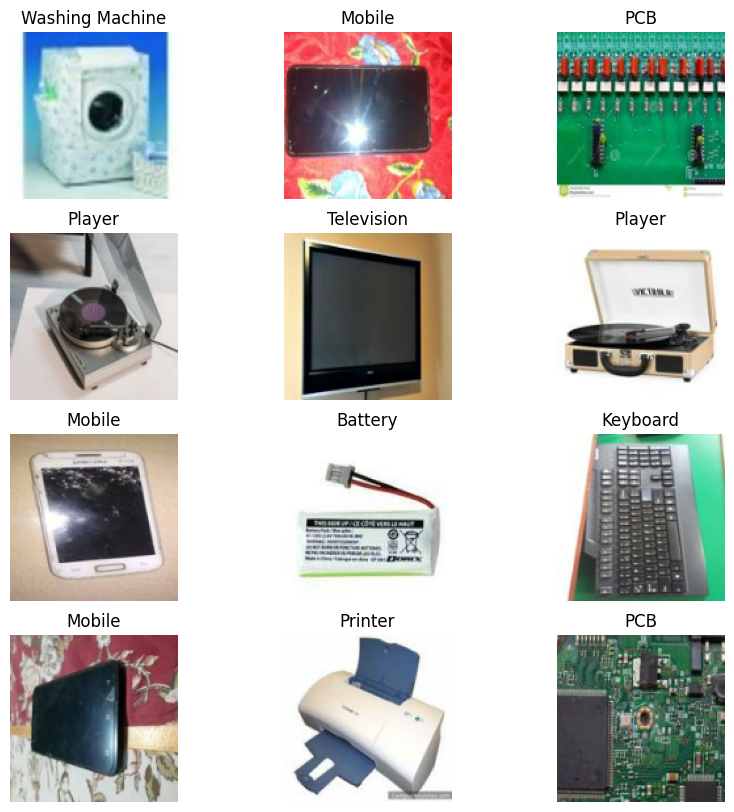

In [ ]:
plt.figure(figsize=(10, 10))

for images, labels in datatrain.take(1):
    for i in range(12):
        ax = plt.subplot(4, 3, i + 1)

    
        plt.imshow(images[i].numpy().astype("uint8"))

    
        plt.title(class_names[labels[i]])

    
        plt.axis("off")


In [17]:
def plot_class_distribution(dataset, title="Class Distribution"):
    class_counts = {}

    for images, labels in dataset:
        for label in labels.numpy():
            class_name = dataset.class_names[label]
            class_counts[class_name] = class_counts.get(class_name, 0) + 1

    
    class_names = list(class_counts.keys())
    counts = list(class_counts.values())

    
    plt.figure(figsize=(10, 6))
    plt.bar(class_names, counts, color='skyblue')
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


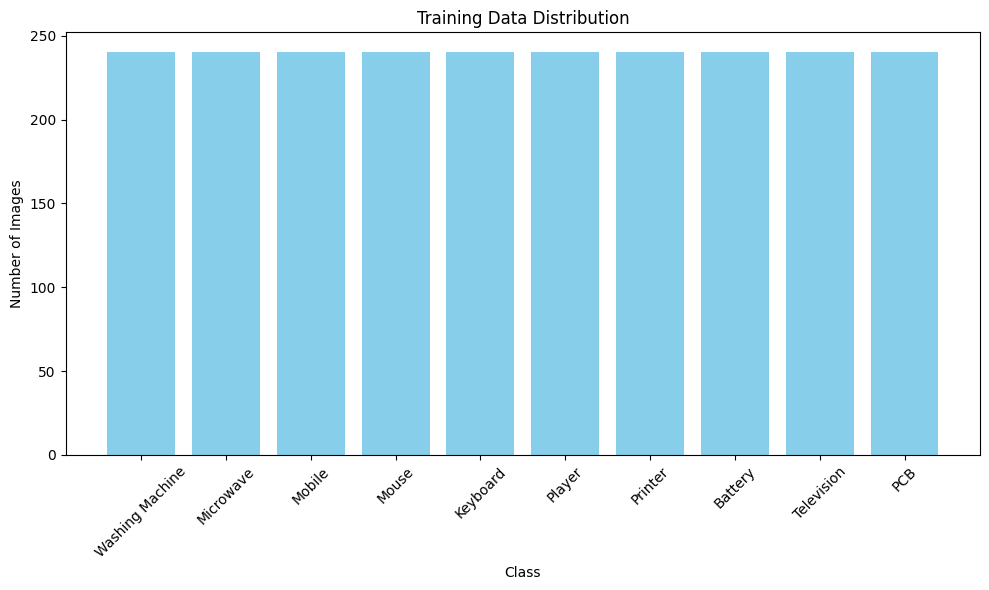

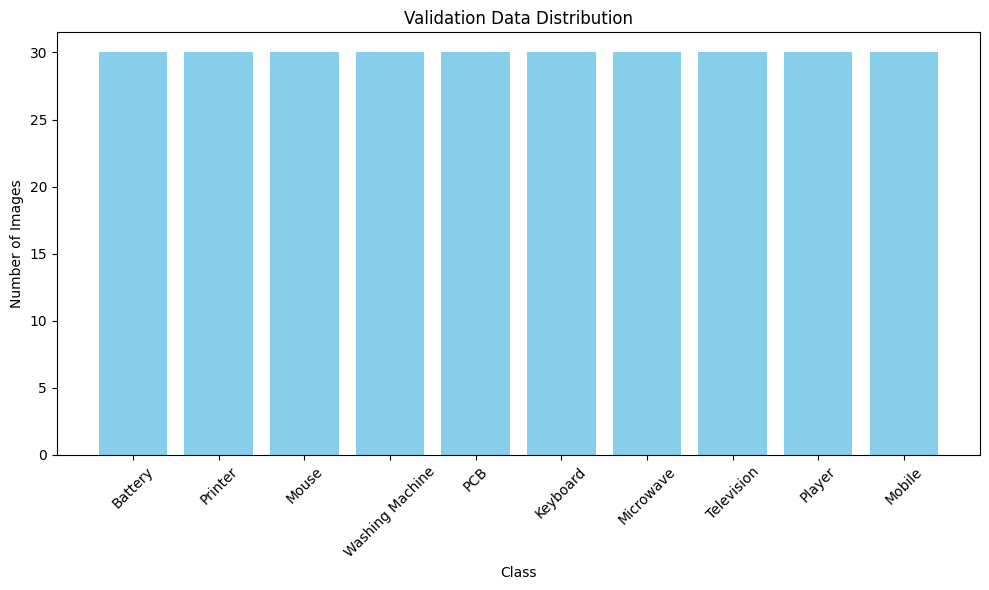

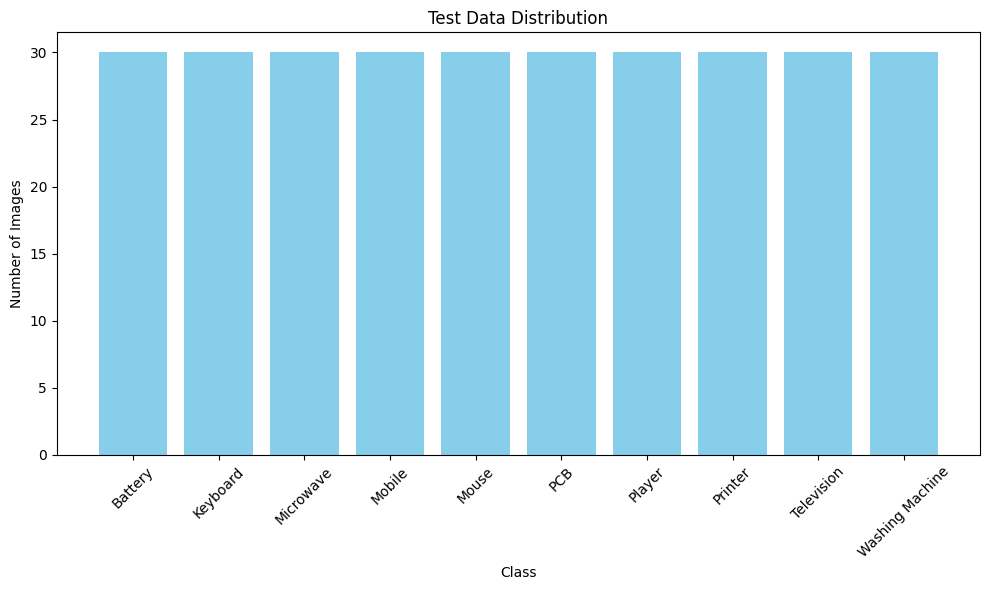

In [18]:
plot_class_distribution(datatrain, "Training Data Distribution")
plot_class_distribution(datavalid, "Validation Data Distribution")
plot_class_distribution(datatest, "Test Data Distribution")

In [19]:

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

In [20]:
base_model = tf.keras.applications.EfficientNetV2B0(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(128, 128, 3)),
    data_augmentation,
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['Accuracy'])

In [ ]:

early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',            
    patience=3,                   
    restore_best_weights=True     
)


In [23]:

epochs = 15

history = model.fit(
    datatrain,                      
    validation_data=datavalid,      
    epochs=epochs,                  
    batch_size=100,                 
    callbacks=[early]               

)



Epoch 1/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step - Accuracy: 0.2563 - loss: 2.1450 - val_Accuracy: 0.7633 - val_loss: 1.2008
Epoch 2/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - Accuracy: 0.7533 - loss: 1.0483 - val_Accuracy: 0.8867 - val_loss: 0.5294
Epoch 3/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - Accuracy: 0.8469 - loss: 0.5573 - val_Accuracy: 0.9300 - val_loss: 0.3134
Epoch 4/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 75s 994ms/step - Accuracy: 0.8953 - loss: 0.3751 - val_Accuracy: 0.9467 - val_loss: 0.2221
Epoch 5/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 74s 985ms/step - Accuracy: 0.9257 - loss: 0.2642 - val_Accuracy: 0.9467 - val_loss: 0.1951
Epoch 6/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - Accuracy: 0.9364 - loss: 0.2148 - val_Accuracy: 0.9467 - val_loss: 0.1875
Epoch 7/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 73s 971ms/step - Accuracy: 0.9605 - loss: 0.1577 - val_Accuracy: 0.9500 - val_loss: 0.1640
Epoch 8/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 73s 967ms/step - Accuracy: 0.9548 - loss: 0.1456 - val_Accuracy: 0.963

In [ ]:
model.summary() 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, 4, 4, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,269,040 (62.06 MB)

 Trainable params: 5,168,458 (19.72 MB)

 Non-trainable params: 763,664 (2.91 MB)

 Optimizer params: 10,336,918 (39.43 MB)

In [ ]:
base_model.summary() 

Model: "efficientnetv2-b0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 128, 128,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 128, 128,  │          0 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 64, 64,    │        864 │ normalization[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 64, 64,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 64, 64,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 64, 64,    │      4,608 │ stem_activation[… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 64, 64,    │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 64, 64,    │          0 │ block1a_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 32, 32,    │      9,216 │ block1a_project_… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 32, 32,    │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 32, 32,    │          0 │ block2a_expand_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_co… │ (None, 32, 32,    │      2,048 │ block2a_expand_a… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_bn  │ (None, 32, 32,    │        128 │ block2a_project_… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_conv │ (None, 32, 32,    │     36,864 │ block2a_project_… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_bn   │ (None, 32, 32,    │        512 │ block2b_expand_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_act… │ (None, 32, 32,    │          0 │ block2b_expand_b

 Total params: 5,919,312 (22.58 MB)

 Trainable params: 5,155,648 (19.67 MB)

 Non-trainable params: 763,664 (2.91 MB)

In [ ]:
acc = history.history['Accuracy']           
val_acc = history.history['val_Accuracy']   
loss = history.history['loss']           
val_loss = history.history['val_loss']      

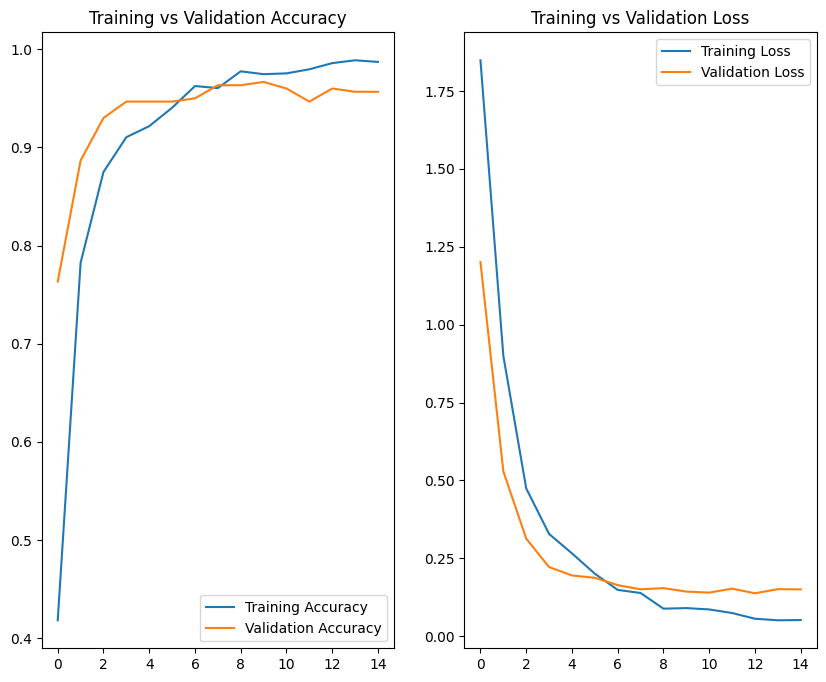

In [ ]:
epochs_range = range(len(acc))            

plt.figure(figsize=(10, 8))            

plt.subplot(1, 2, 1)                        
plt.plot(epochs_range, acc, label='Training Accuracy')       
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right')              
plt.title('Training vs Validation Accuracy') 

plt.subplot(1, 2, 2)                       
plt.plot(epochs_range, loss, label='Training Loss')        
plt.plot(epochs_range, val_loss, label='Validation Loss')   
plt.legend(loc='upper right')              
plt.title('Training vs Validation Loss')    

plt.show()                                  


In [28]:
loss, accuracy = model.evaluate(datatest)
print(f'Test accuracy is{accuracy:.4f}, Test loss is {loss:.4f}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 426ms/step - Accuracy: 0.9516 - loss: 0.1473
Test accuracy is0.9533, Test loss is 0.1391


In [29]:
y_true = np.concatenate([y.numpy() for x, y in datatest], axis=0)  


y_pred_probs = model.predict(datatest)

y_pred = np.argmax(y_pred_probs, axis=1)                           

print(confusion_matrix(y_true, y_pred))                            
print(classification_report(y_true, y_pred))                     


10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step 
[[28  0  0  0  0  1  0  0  0  1]
 [ 1 29  0  0  0  0  0  0  0  0]
 [ 0  0 29  0  0  0  0  1  0  0]
 [ 0  0  0 29  0  1  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 28  2  0  0  0]
 [ 0  0  2  0  0  0 28  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0]
 [ 0  0  2  1  0  0  1  0 26  0]
 [ 0  0  0  0  0  0  0  0  0 30]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        30
           1       1.00      0.97      0.98        30
           2       0.88      0.97      0.92        30
           3       0.97      0.97      0.97        30
           4       1.00      0.97      0.98        30
           5       0.93      0.93      0.93        30
           6       0.90      0.93      0.92        30
           7       0.94      1.00      0.97        30
           8       1.00      0.87      0.93        30
           9       0.97      1.00      0.98        30

    accuracy                     

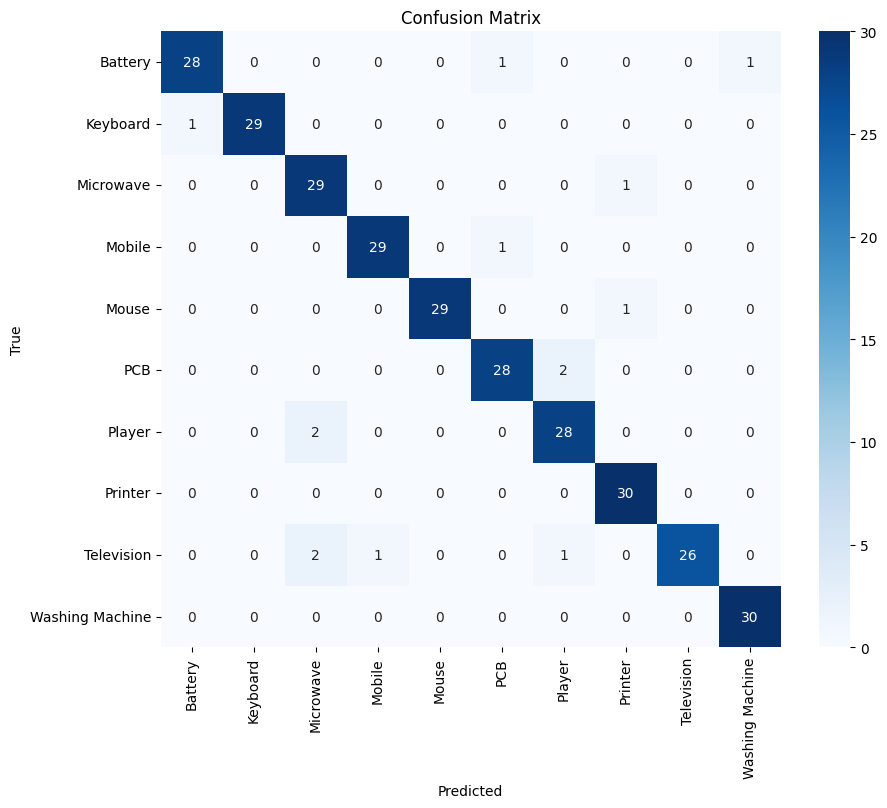

In [30]:
cm = confusion_matrix(y_true, y_pred)                                
                                                    

plt.figure(figsize=(10, 8))                                             
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=class_names, 
            yticklabels=class_names, 
            cmap='Blues')                                                

plt.xlabel('Predicted')                                                 
plt.ylabel('True')                                                       
plt.title('Confusion Matrix')                                            
plt.show()                                                        
